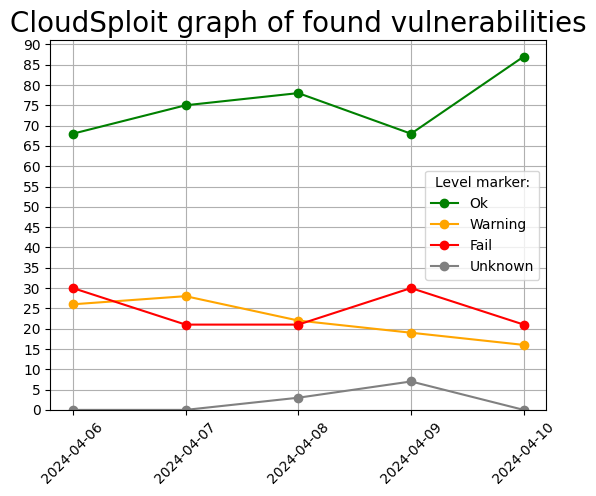

In [7]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import time


def get_param_from_json(file_name):

    file_name = os.path.join(folder_path, file_name)

    with open(file_name, "r") as f:
        data = json.load(f)

    dict_counter = {'OK':0, 'FAIL':0, 'WARN':0, 'UNKNOWN':0}

    for resource in data:

        dict_counter[resource['status']] += 1

    return dict_counter


folder_path = '/home/pespav/Projects_GCP/report-cloudsploit'

files_list = os.listdir(folder_path)

filtered_files_list = [file for file in files_list if file.startswith('report_cloudsploit') and file.endswith('.json')]

filtered_files_list = sorted(filtered_files_list)

ok, fail, warn, unknown = [],[],[],[]

file_dates = []

for file in filtered_files_list:
    d = get_param_from_json(file)

    ok.append(d["OK"])
    fail.append(d["FAIL"])
    unknown.append(d["WARN"])
    warn.append(d["UNKNOWN"])

    file_dates.append(file[19:-14])


# Настройка цветов линий и точек
plt.plot(ok, color='green', marker='o', label='Ok')
plt.plot(warn, color='orange', marker='o', label='Warning')
plt.plot(fail, color='red', marker='o', label='Fail')
plt.plot(unknown, color='grey', marker='o', label='Unknown')

# Добавление сетки
plt.grid(True)

plt.title(label="CloudSploit graph of found vulnerabilities",
          fontsize=20)

# Добавление легенды
plt.legend(title='Level marker:')

# Установка меток оси x с числовым форматом дат
plt.xticks(range(len(file_dates)), file_dates, rotation=45)

# Установка меток на оси y через каждые 2 значения
plt.yticks(range(0, max(max(ok), max(unknown), max(warn), max(fail)) + 4, 5))

# Установка диапазона значений на оси y
plt.ylim(0, max(max(ok), max(unknown), max(warn), max(fail)) + 4)


plt.show()

In [18]:
result_to_csv = pd.DataFrame(columns=['date_time', 'status', 'title', 'description', 'message', 'compliance', 'old_status', 'new_status'])

result_to_csv

,date_time,status,title,description,message,compliance,old_status,new_status


In [19]:
for idx in range(1, len(filtered_files_list)):
    
    file_name1 = os.path.join(folder_path, filtered_files_list[idx-1])
    file_name2 = os.path.join(folder_path, filtered_files_list[idx])

    with open(file_name1, "r") as f:
        data1 = json.load(f)

    with open(file_name2, "r") as f:
        data2 = json.load(f)

    date_time = filtered_files_list[idx][21:-5]

    for index in range(len(data2)):
        if data2[index]['status'] != data1[index]['status']:
            
            status = 'new' if data1[index]['status'] == 'OK' else 'fixed' if data2[index]['status'] == 'OK' else 'changed'

            data_dict_list = [
                {
                    'date_time': date_time,
                    'status' : status,
                    'title': data2[index]['title'],
                    'description': data2[index]['description'],
                    'message' : data2[index]['message'],
                    'compliance' : data2[index]['compliance'],
                    'old_status': data1[index]['status'],
                    'new_status' : data2[index]['status'],
                }
            ]
            
            df = pd.DataFrame(data_dict_list, columns=['date_time', 'status', 'title', 'description', 'message', 'compliance', 'old_status', 'new_status'])

            result_to_csv = pd.concat([result_to_csv, df], ignore_index=True)

current_time = time.time()

formatted_time = time.strftime('%Y-%m-%d_%H:%M:%S', time.localtime(current_time))

result_to_csv.to_csv(f'cloudsploit_report_csv_{formatted_time}.csv')


In [20]:
result_to_csv

,date_time,status,title,description,message,compliance,old_status,new_status
0,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
1,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
2,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
3,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
4,24-04-07_02:32:01,changed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,UNKNOWN
5,24-04-07_02:32:01,changed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,UNKNOWN
6,24-04-07_02:32:01,changed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,UNKNOWN
7,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
8,24-04-07_02:32:01,fixed,Flow Logs Enabled,Ensures VPC flow logs are enabled for traffic ...,The subnet does not have flow logs enabled,HIPAA: VPC Flow Logs provide a detailed traffi...,FAIL,OK
9,24-04-07_02:32:01,fixed,Logging Enabled,Ensures all Kubernetes clusters have logging e...,Unable to query Kubernetes clusters,HIPAA: HIPAA requires the logging of all activ...,UNKNOWN,OK


In [28]:
filtered_files_list

['report_cloudsploit_2024-04-06_02-30-19.json',
 'report_cloudsploit_2024-04-07_02-32-01.json',
 'report_cloudsploit_2024-04-08_02-31-40.json',
 'report_cloudsploit_2024-04-09_02-30-45.json',
 'report_cloudsploit_2024-04-10_02-30-11.json']